In [15]:
#Ensemble de arboles de decision

#limpio la memoria
rm( list=ls() )  #Borro todos los objetos
gc()   #Garbage Collection

require("data.table")
require("rpart")
require("rpart.plot")

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,612047,32.7,3354793,179.2,6552328,350.0
Vcells,1243081,9.5,98921092,754.8,154564206,1179.3


In [16]:
#Aqui se debe poner la carpeta de la computadora local
setwd("C:\\Users\\oliva\\OneDrive\\Desktop\\DS\\Austral\\08 - Labo1") #Aqui se debe poner la ruta de la PC local


In [21]:
#cargo los datos donde entreno
dtrain  <- fread("./labo/datasets/paquete_premium_202011.csv")

#cargo los datos donde aplico el modelo
dapply  <- fread("./labo/datasets/paquete_premium_202101.csv")


In [22]:
#Establezco cuales son los campos que puedo usar para la prediccion
campos_buenos  <- setdiff(  colnames(dtrain) ,  c("clase_ternaria") )

param_buenos  <- list( "cp"=         -1,
                       "minsplit"=  300,
                       "minbucket"= 150,
                       "maxdepth"=    6 )

num_trees         <-  15    #voy a generar 20 arboles, a mas arboles mas tiempo de proceso y MEJOR MODELO
feature_fraction  <-   0.5  #entreno cada arbol con solo 50% de las variables variables

set.seed(679561) #Establezco la semilla aleatoria, cambiar por SU primer semilla

In [23]:
#inicializo en CERO el vector de las probabilidades en dapply
#Aqui es donde voy acumulando, sumando, las probabilidades
probabilidad_ensemble  <- rep( 0, nrow(dapply) )

tb_ensembles  <-  copy( dapply[ , list( numero_de_cliente ) ] )

#genero el archivo para Kaggle
#creo la carpeta donde va el experimento
dir.create( "./labo/exp/", showWarnings = FALSE  )
dir.create( "./labo/exp/KA2101_azar/", showWarnings = FALSE )

#aqui es donde voy a graficar los arboles
pdf( "./labo/exp/KA2101_azar/arbolitos.pdf", paper="a4r" )

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"

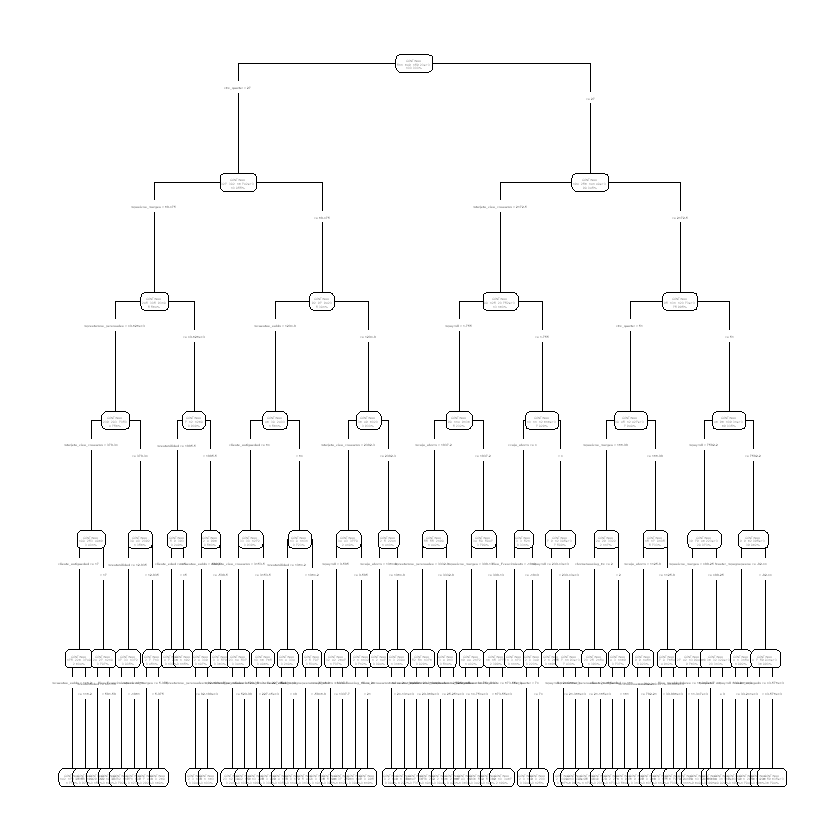

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"

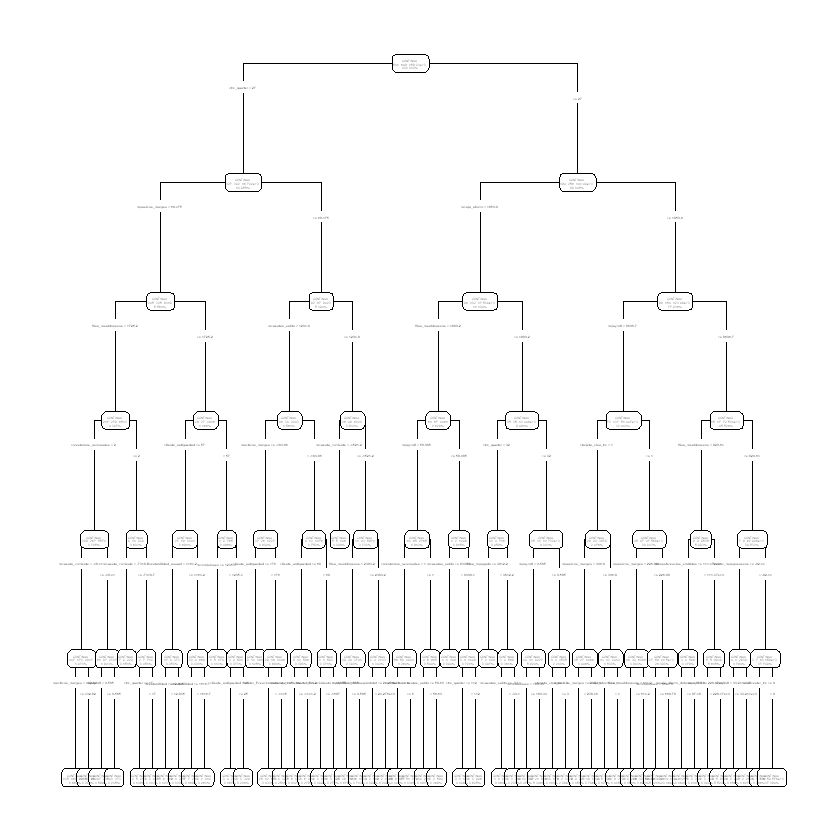

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"

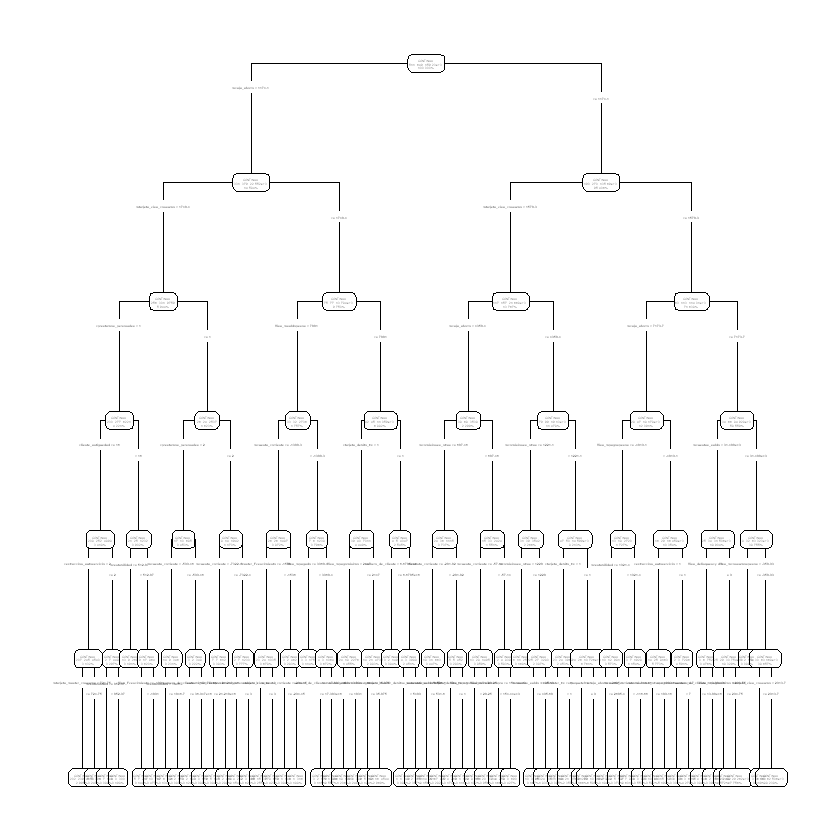

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"

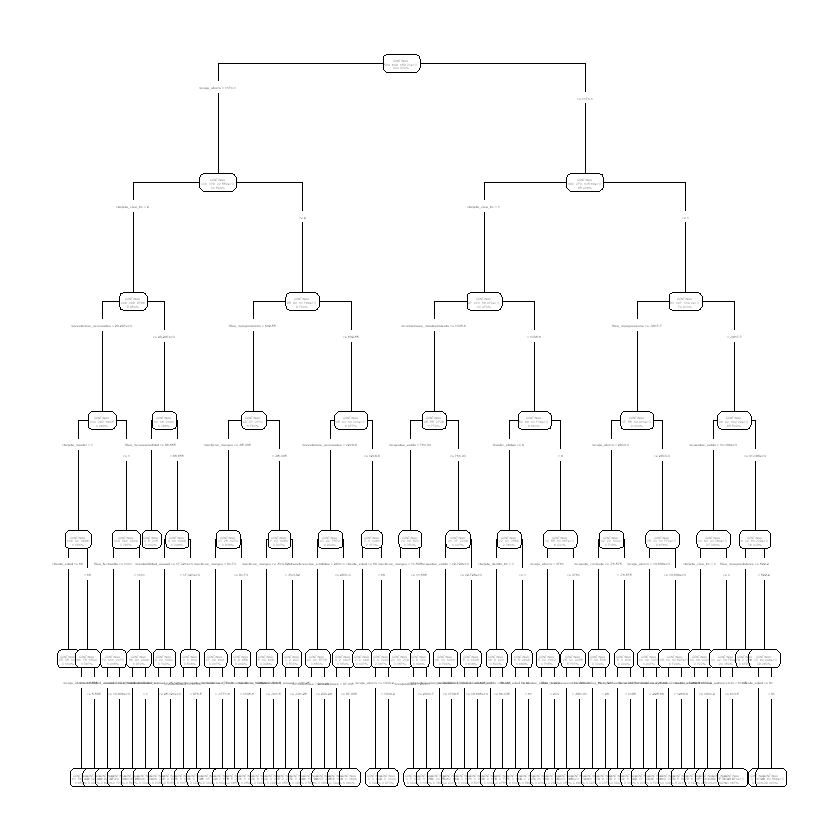

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"

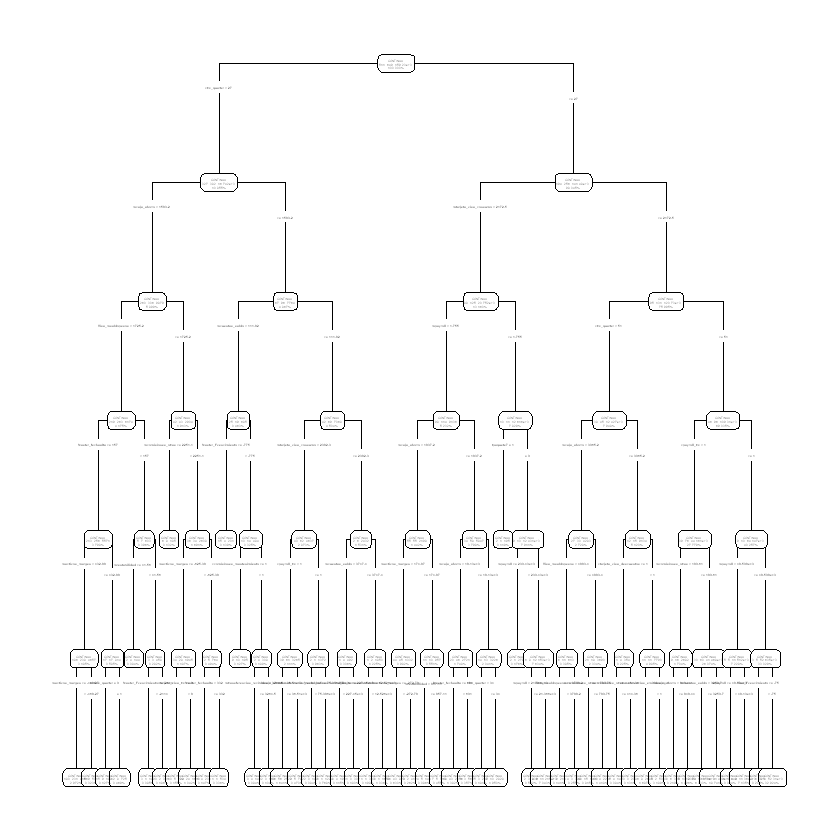

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"

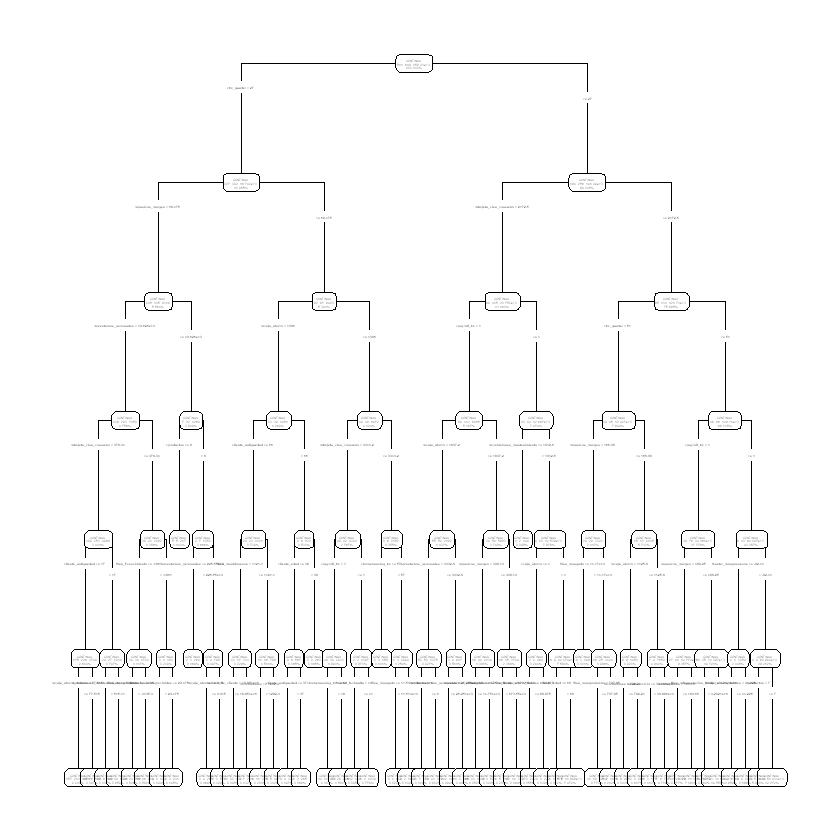

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"

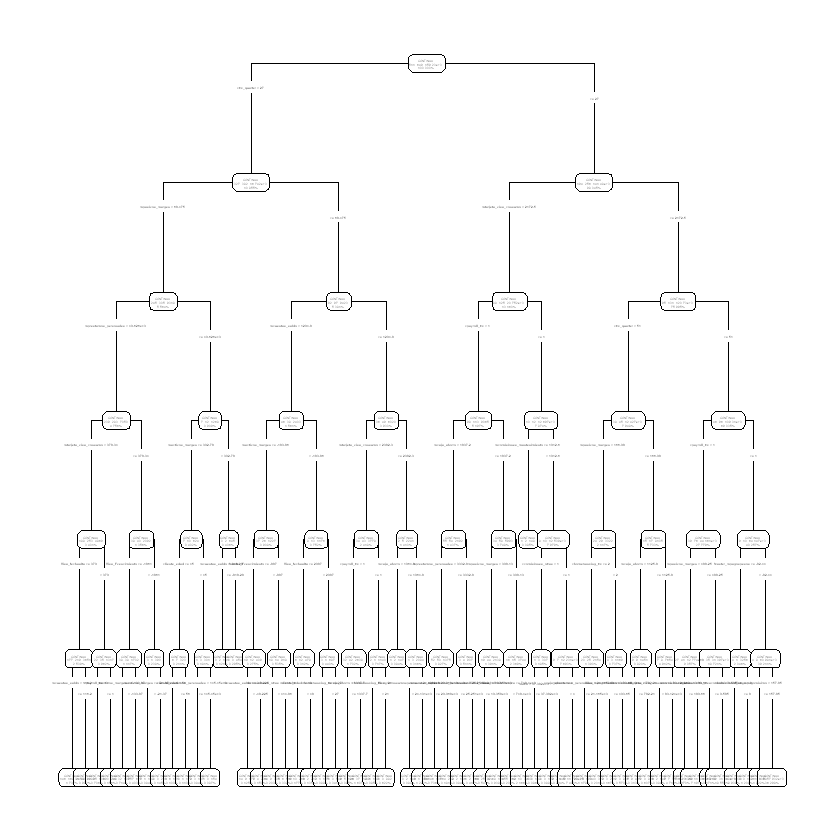

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"

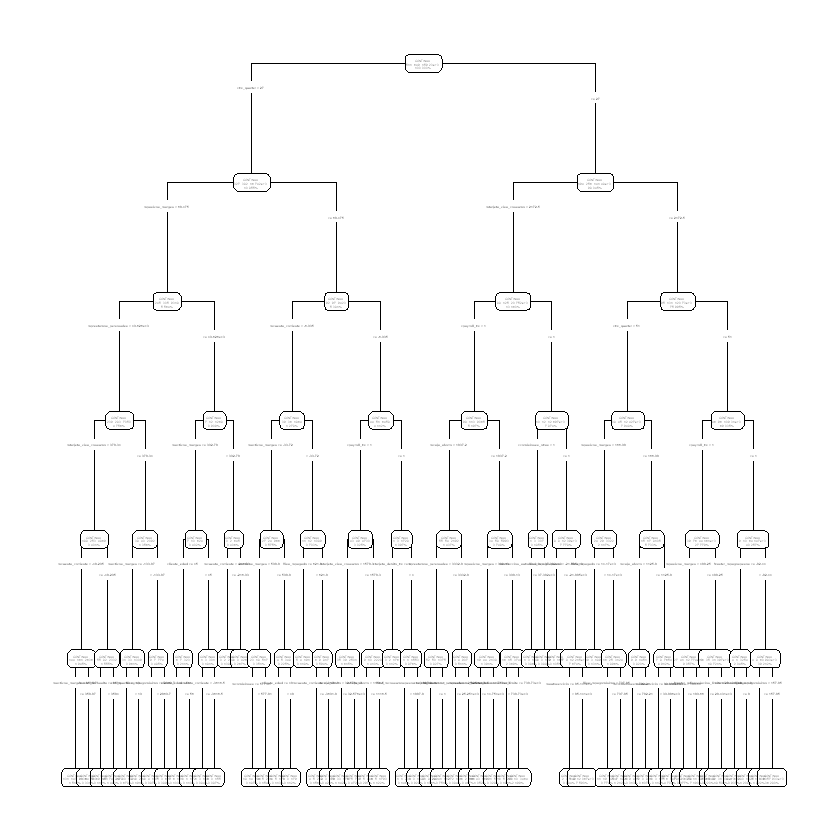

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"

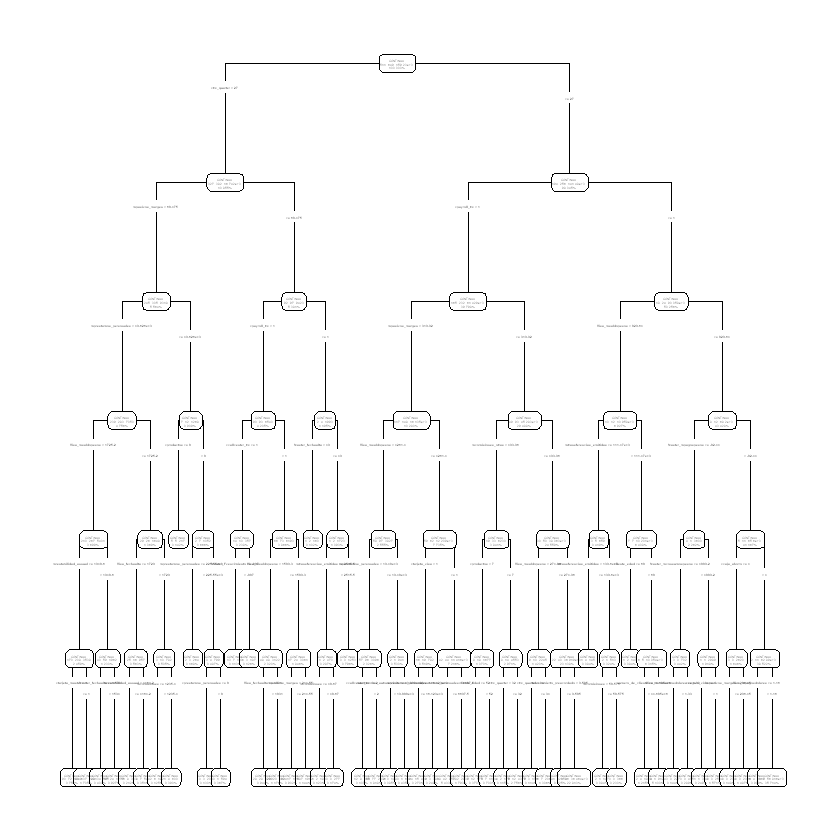

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"

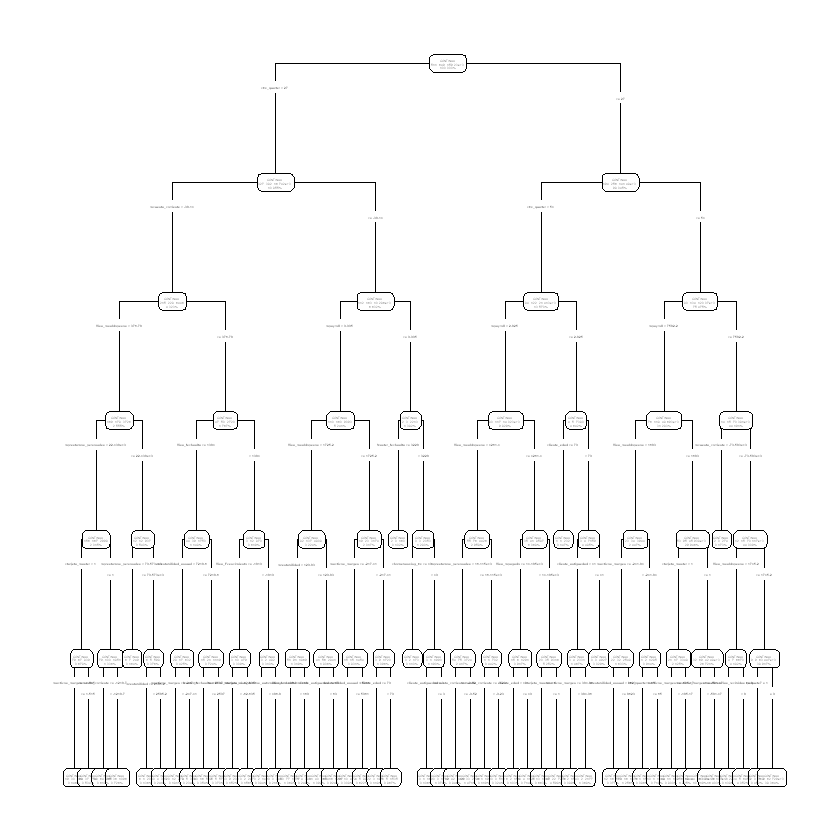

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"

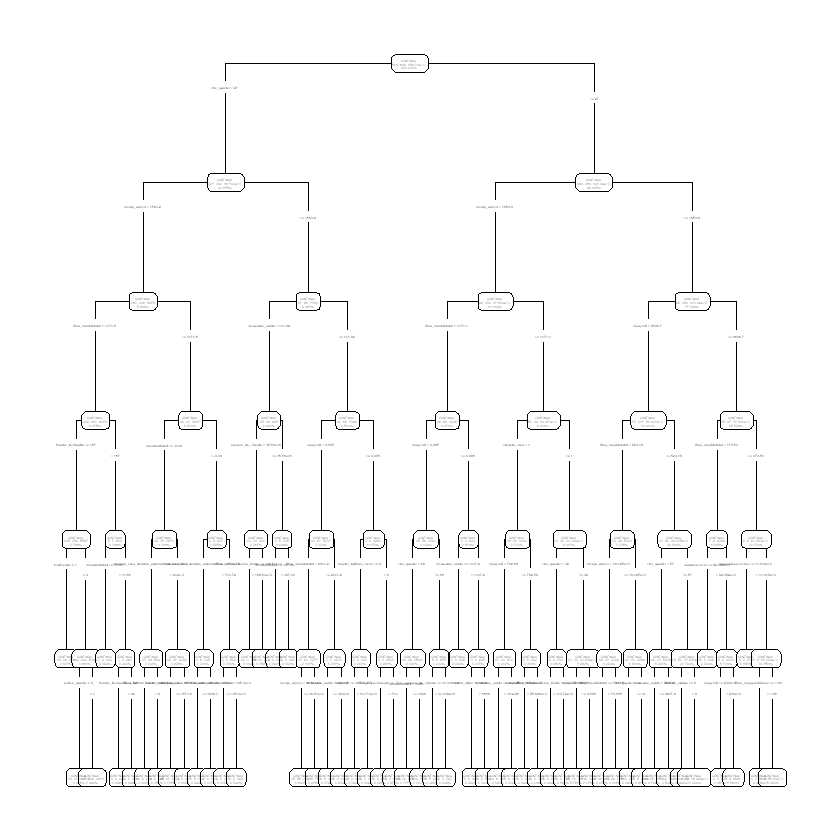

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"

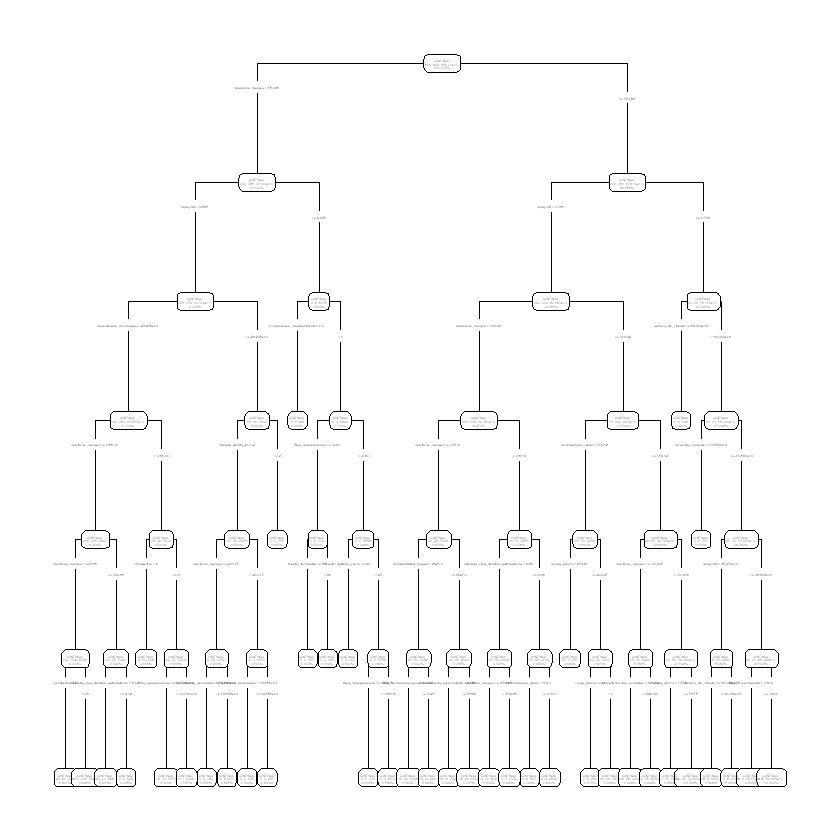

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"

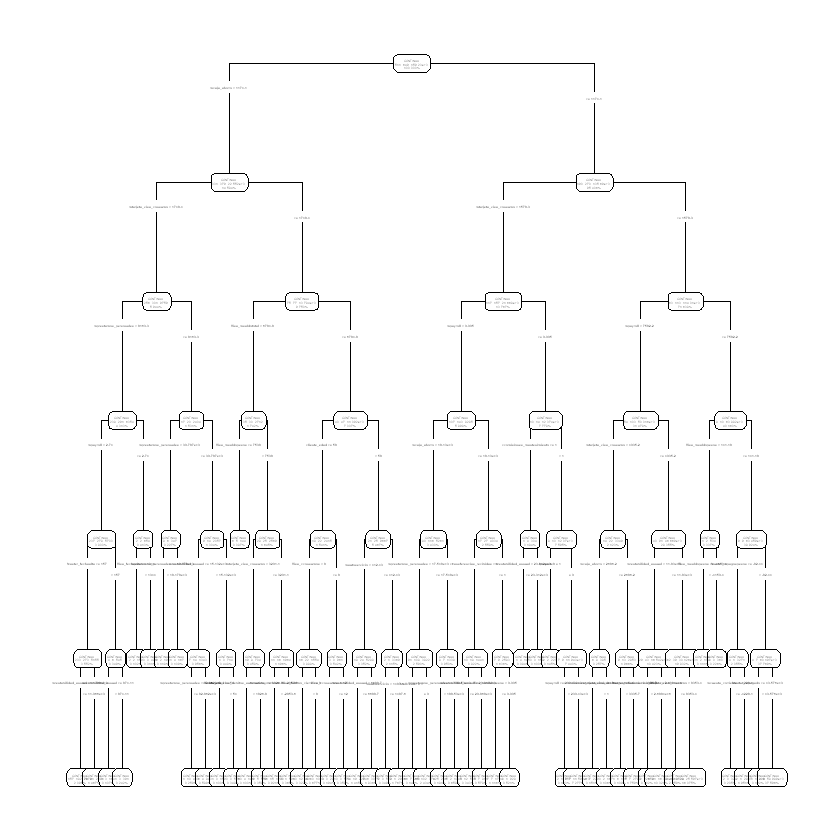

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"

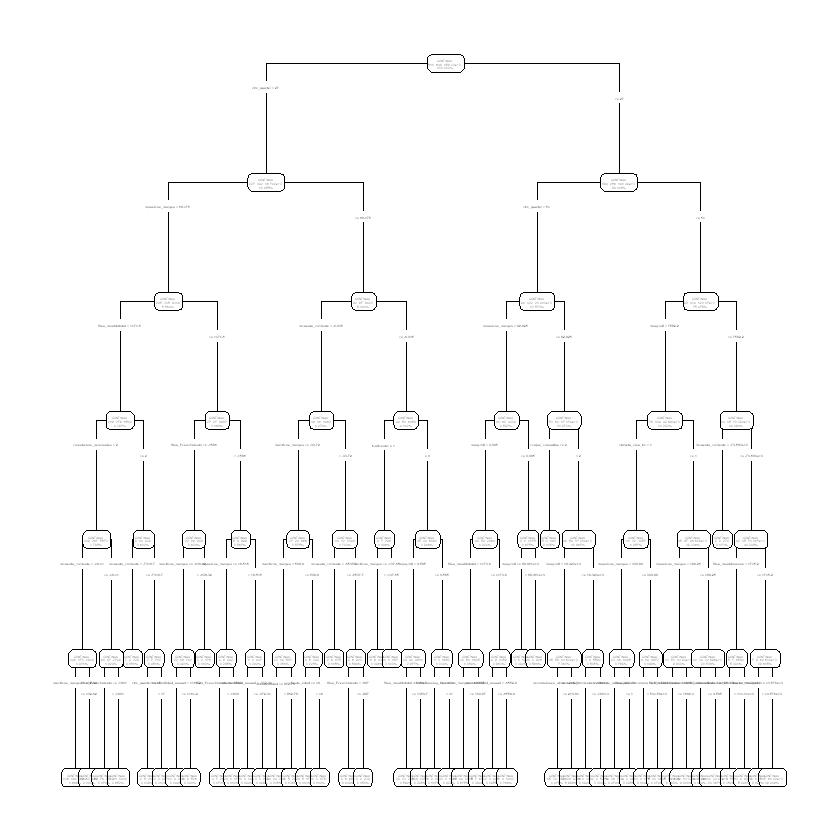

pdf 
  3

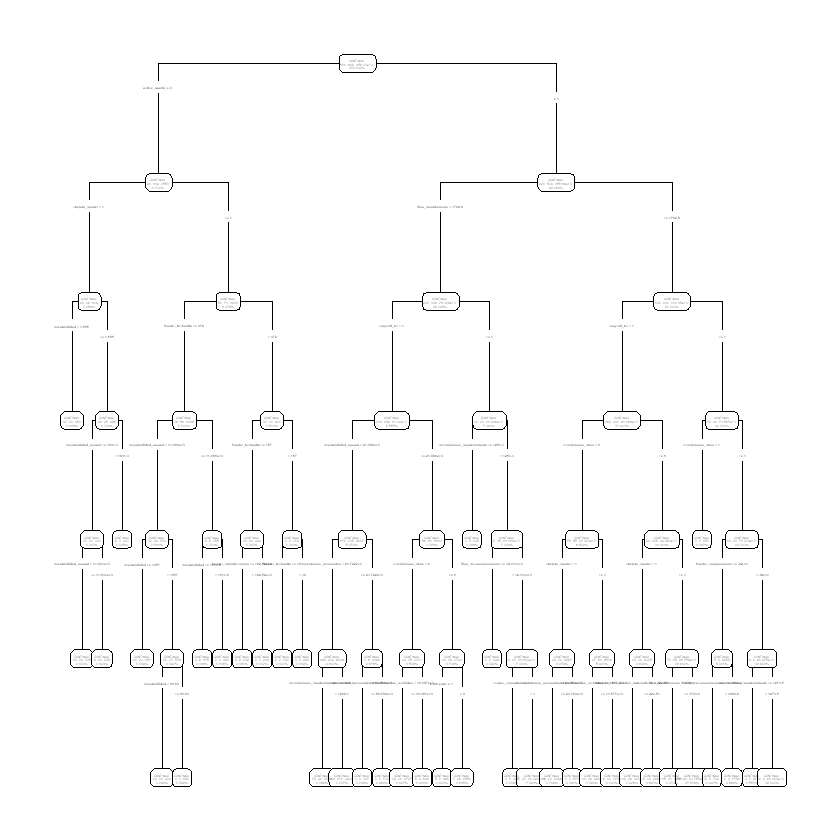

In [24]:
#Genero los arboles y voy sumando la probabilidad que el arbol entrenado en 202011 asigna a cada registro de 202101

for(  i in  1:num_trees ) #genero  num_trees arboles
{
  qty_campos_a_utilizar  <- as.integer( length(campos_buenos)* feature_fraction )
  campos_random  <- sample( campos_buenos, qty_campos_a_utilizar )
  
  #paso de un vector a un string con los elementos separados por un signo de "+"
  #este hace falta para la formula
  campos_random  <- paste( campos_random, collapse=" + ")

  #armo la formula para rpart
  formulita  <- paste0( "clase_ternaria ~ ", campos_random )

  #genero el arbol de decision
  modelo  <- rpart( formulita,
                    data= dtrain,
                    xval= 0,
                    control= param_buenos )

  #grafico el modelo
  prp(modelo, extra=101, digits=5, branch=1, type=4, varlen=0, faclen=0)

  #aplico el modelo a los datos que no tienen clase
  prediccion  <- predict( modelo, dapply , type = "prob")
  
  tb_ensembles[  ,  paste0( "arbol", i) :=  prediccion[ , "BAJA+2"] ]

  #voy acumulando la probabilidad
  probabilidad_ensemble  <- probabilidad_ensemble +  prediccion[, "BAJA+2"]
}

dev.off()  #dejo de imprimir

In [25]:
#fue sumando las probabilidades, ahora hago el cociente por la cantidad de arboles
#o sea, calculo el promedio
probabilidad_ensemble  <- probabilidad_ensemble / num_trees

#asigngo el promedio y grabo
tb_ensembles[  , prob_promedio := probabilidad_ensemble ]
fwrite( tb_ensembles,
        file="./labo/exp/KA2101_azar/ensemble.csv",
        sep="\t" )

#Genero la entrega para Kaggle
entrega  <- as.data.table( list( "numero_de_cliente"= dapply[  , numero_de_cliente],
                                 "Predicted"= as.numeric(probabilidad_ensemble > 1/60) ) ) #genero la salida

#genero el archivo para Kaggle
#creo la carpeta donde va el experimento
dir.create( "./labo/exp/", showWarnings = FALSE  )
dir.create( "./labo/exp/KA2101_azar/", showWarnings = FALSE )

#grabo el archivo para Kaggle
fwrite( entrega, 
        file= "./labo/exp/KA2101_azar/K311_001.csv", 
        sep= "," )